In [1]:
import sys
sys.path.append("gpib_instrument_control")
import hp_3478a
import hp_8700_series_vna
import numpy as np
import time
import yig_controller_test
import matplotlib.pyplot as plt
import scipy.io as sio
import skrf.network
import yig_controller_test
import yig_filter_model

plt.rcParams['figure.figsize'] = [15, 10]

#Instruments and devices
yigControllerPort='/dev/ttyUSB0'
vna = hp_8700_series_vna.Hp8753A()
curMeter = hp_3478a.Hp3478A()
yc = yig_controller_test.YigController(yigControllerPort)

Waiting for init... Done


In [2]:
def dB(data):
    return 20*np.log10(np.abs(data))


def fsweep(frequencies, span):
    vna.setPoints(201)
    filterMap=None
    spanMap=None
    #print(frequencies[0])
    #yc.tune(frequencies[0])
    #vna.setStartFrequency(frequencies[0]-span)
    #vna.setStopFrequency(frequencies[0]+span)
    #spar=vna.readSParameter('S21')
    #time.sleep(1)
    for fr in frequencies:
        yc.tune(fr)
        vna.setStartFrequency(fr-span)
        vna.setStopFrequency(fr+span)
        spar=vna.readSParameter('S21')
        fax = vna.frequencies()
        spanMap = yig_controller_test.stackVector(spanMap, fax)
        dePar=fix.deembedFrom(fax, spar)
        filterMap=yig_controller_test.stackVector(filterMap, dePar)
    return filterMap, spanMap


def fsweepOffs(frequencies, offs, span):
    vna.setPoints(201)
    filterMap=None
    spanMap=None
    #print(frequencies[0])
    #yc.tune(frequencies[0])
    #vna.setStartFrequency(frequencies[0]-span)
    #vna.setStopFrequency(frequencies[0]+span)
    #spar=vna.readSParameter('S21')
    #time.sleep(1)
    for fr, off in zip(frequencies, offs):
        yc.tune(fr+off)
        vna.setStartFrequency(fr-span)
        vna.setStopFrequency(fr+span)
        spar=vna.readSParameter('S21')
        fax = vna.frequencies()
        spanMap = yig_controller_test.stackVector(spanMap, fax)
        dePar=fix.deembedFrom(fax, spar)
        filterMap=yig_controller_test.stackVector(filterMap, dePar)
    return filterMap, spanMap

calMeas = skrf.network.Network('cal_through.s2p')

fix = yig_filter_model.SimpleS21Fixture(calMeas.f, calMeas.s[:, 1, 0])

yc.yigB.set(0,0)
yc.yigA.set(6,0)
yc.yigB.set(7,0)


In [3]:

wideSweepMap, wideSweepSpanMap= fsweep(np.linspace(.6e9, 18e9, 101), 250e6)


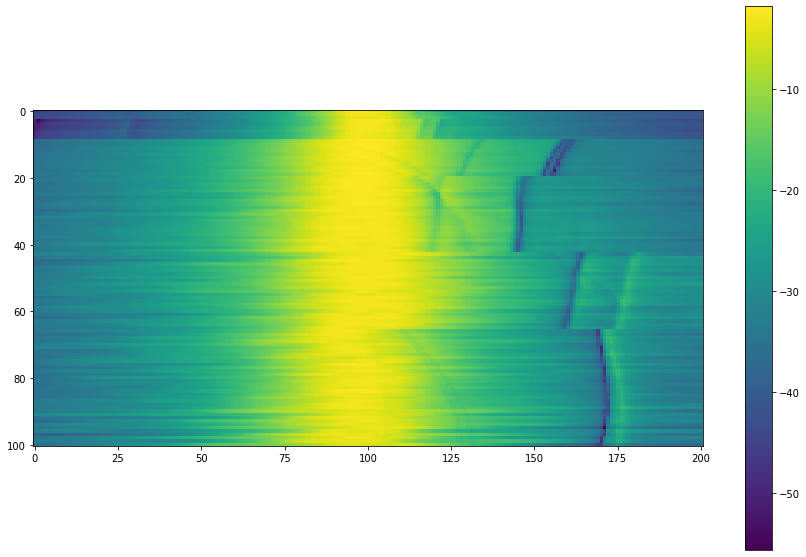

In [4]:
plt.figure()
plt.imshow(20*np.log10(np.abs(wideSweepMap+0.0001)))
plt.colorbar()
plt.show()


In [5]:
narrowSweepMap, narrowSweepSpanMap = fsweep(np.linspace(.6e9, 18e9, 101), 50e6)

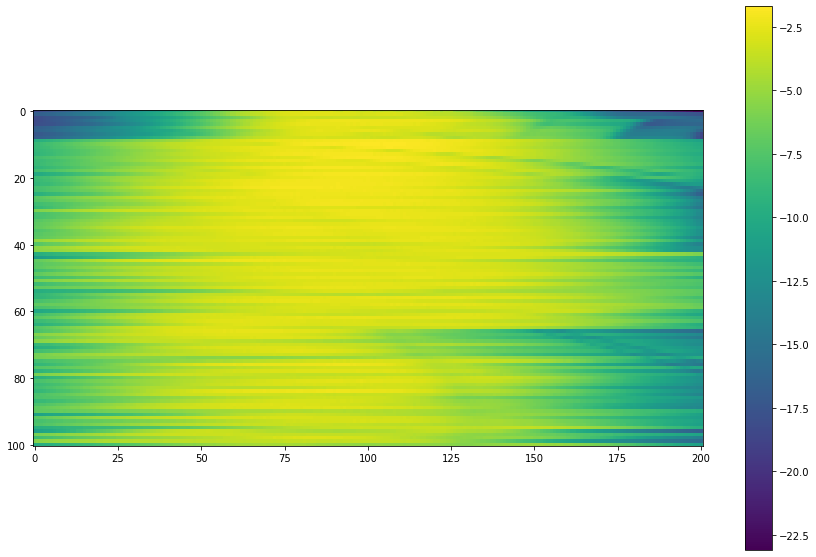

In [6]:
plt.figure()
plt.imshow(20*np.log10(np.abs(narrowSweepMap)))
plt.colorbar()
plt.show()

In [7]:
sf = np.linspace(.6e9, 18e9, 101)
np.random.shuffle(sf)
narrowRandSweepMap, narrowRandSweepSpanMap = fsweep(sf, 50e6)

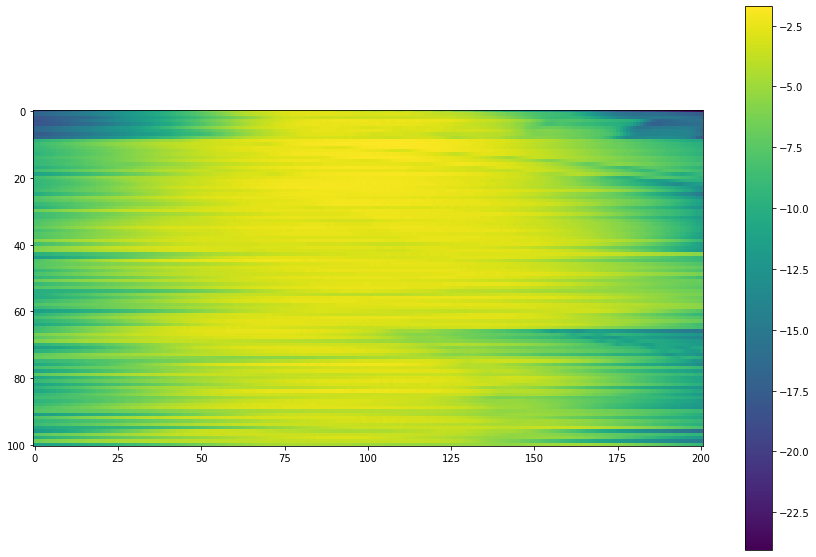

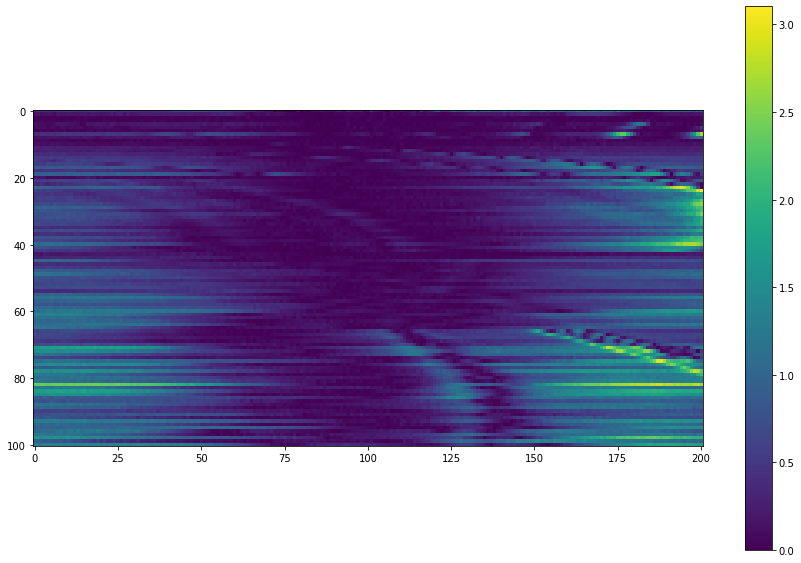

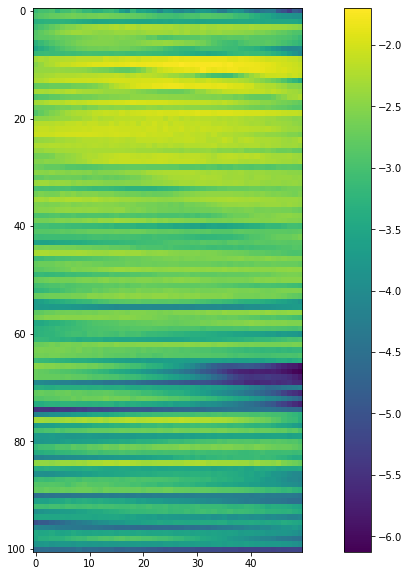

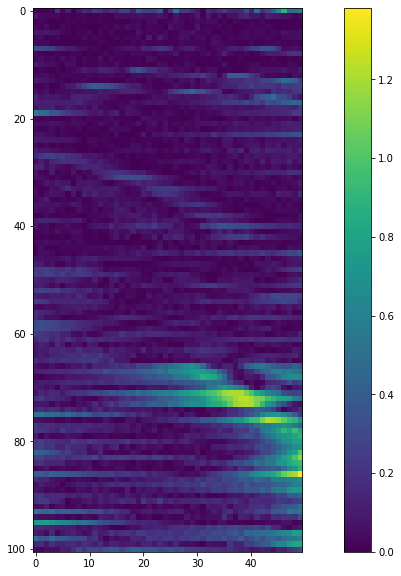

In [8]:
idx = np.argsort(sf)
plt.figure()
plt.imshow(20*np.log10(np.abs(narrowRandSweepMap[idx,:])))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(narrowRandSweepMap[idx,:])-dB(narrowSweepMap)))
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(20*np.log10(np.abs(narrowRandSweepMap[idx,75:125])))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(narrowRandSweepMap[idx,75:125])-dB(narrowSweepMap[:,75:125])))
plt.colorbar()
plt.show()

In [9]:
longSweepMap, longSweepSpanMap = fsweep(np.linspace(.6e9, 18e9, 154*4+1), 50e6)

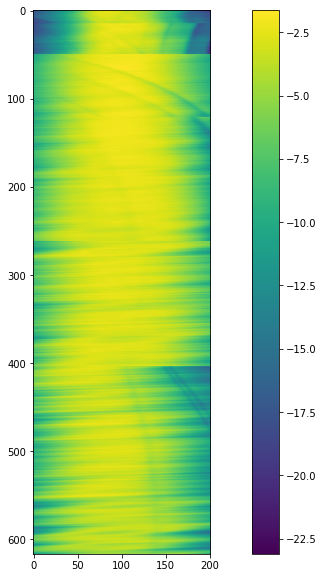

In [10]:
plt.figure()
plt.imshow(dB(longSweepMap))
plt.colorbar()
plt.show()


In [11]:
longSweepMap2, longSweepSpanMap2 = fsweep(np.linspace(.6e9, 18e9, 154*4+1), 50e6)

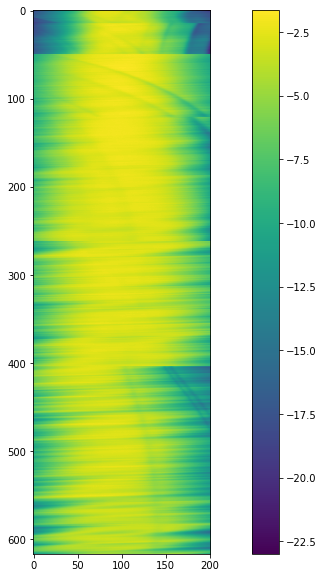

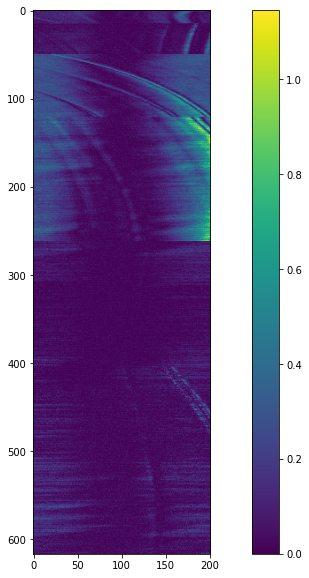

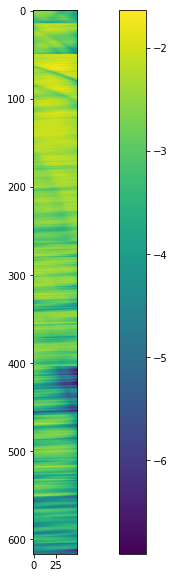

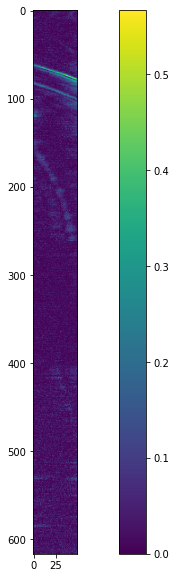

In [12]:
plt.figure()
plt.imshow(dB(longSweepMap2))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(longSweepMap2)-dB(longSweepMap)))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(dB(longSweepMap2[:,75:125]))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(longSweepMap2[:,75:125])-dB(longSweepMap[:,75:125])))
plt.colorbar()
plt.show()

In [13]:
fstart = 600e6
fstop = 1e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep0, sectionSeepSpan0 = fsweep(np.linspace(fstart, fstop, num), 100e6)

41


In [14]:
fstart = 1010e6
fstop = 2e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep1, sectionSeepSpan1 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [15]:
fstart = 2010e6
fstop = 3e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep2, sectionSeepSpan2 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [16]:
fstart = 3010e6
fstop = 4e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep3, sectionSeepSpan3 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [17]:
fstart = 4010e6
fstop = 5e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep4, sectionSeepSpan4 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [18]:
fstart = 5010e6
fstop = 6e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep5, sectionSeepSpan5 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [19]:
fstart = 6010e6
fstop = 7e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep6, sectionSeepSpan6 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [20]:
fstart = 7010e6
fstop = 8e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep7, sectionSeepSpan7 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [21]:
fstart = 8010e6
fstop = 9e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep8, sectionSeepSpan8 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [22]:
fstart = 9010e6
fstop = 10e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep9, sectionSeepSpan9 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [24]:
fstart = 10010e6
fstop = 11e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep10, sectionSeepSpan10 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [25]:
fstart = 11010e6
fstop = 12e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep11, sectionSeepSpan11 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [26]:
fstart = 12010e6
fstop = 13e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep12, sectionSeepSpan12 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [27]:
fstart = 13010e6
fstop = 14e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep13, sectionSeepSpan13 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [28]:
fstart = 14010e6
fstop = 15e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep14, sectionSeepSpan14 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [29]:
fstart = 15010e6
fstop = 16e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep15, sectionSeepSpan15 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [30]:
fstart = 16010e6
fstop = 17e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep16, sectionSeepSpan16 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [32]:
fstart = 17010e6
fstop = 18e9
delta = 10e6
num = int(1+(fstop-fstart)/delta)
print(num)
sectionSweep17, sectionSeepSpan17 = fsweep(np.linspace(fstart, fstop, num), 100e6)

100


In [33]:
megaSweep = np.concatenate((sectionSweep0, sectionSweep1, sectionSweep2, sectionSweep3, sectionSweep4, sectionSweep5, sectionSweep6, sectionSweep7, sectionSweep8, sectionSweep9, sectionSweep10, sectionSweep11, sectionSweep12, sectionSweep13, sectionSweep14, sectionSweep15, sectionSweep16, sectionSweep17 ), axis = 0)
megaSpan = np.concatenate((sectionSeepSpan0, sectionSeepSpan1, sectionSeepSpan2, sectionSeepSpan3, sectionSeepSpan4, sectionSeepSpan5, sectionSeepSpan6, sectionSeepSpan7, sectionSeepSpan8, sectionSeepSpan9, sectionSeepSpan10, sectionSeepSpan11, sectionSeepSpan12, sectionSeepSpan13, sectionSeepSpan14, sectionSeepSpan15, sectionSeepSpan16, sectionSeepSpan17), axis = 0)

sio.savemat('megasweep.mat', {'sweep':megaSweep, 'span':megaSpan})



2.99541730401547 -5.428790667337621 -1.6355011466784153
2.7010301589127774 -5.010780068014408 -1.6101017890810203


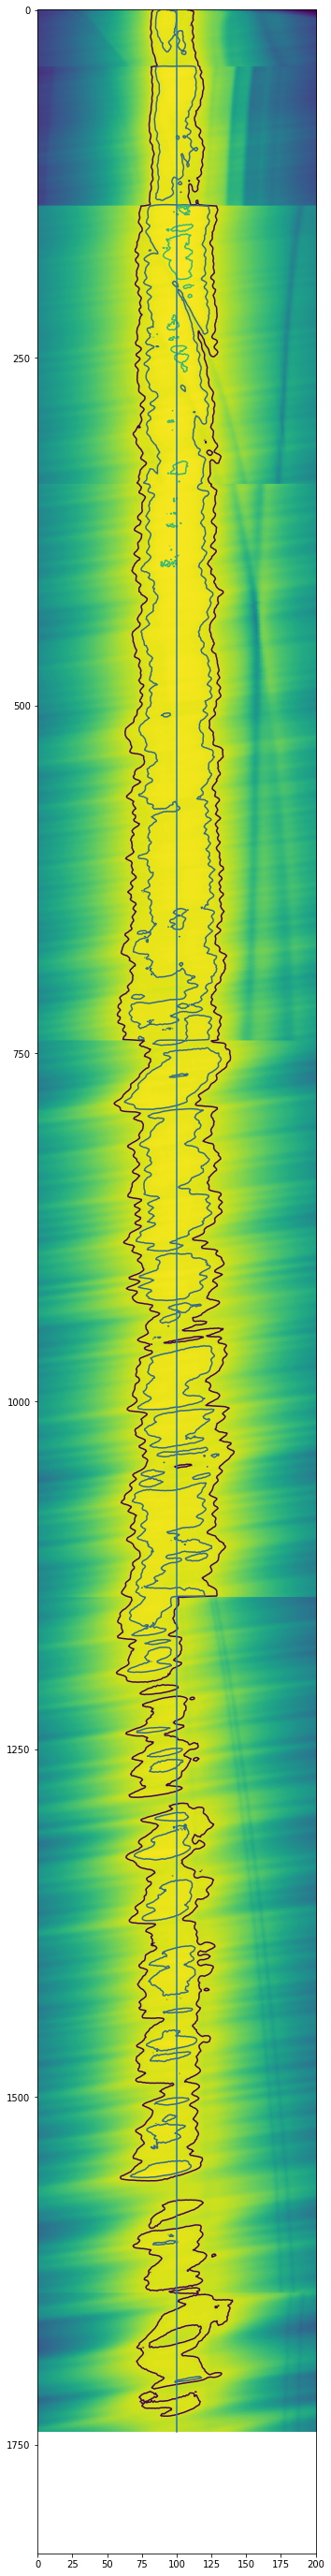

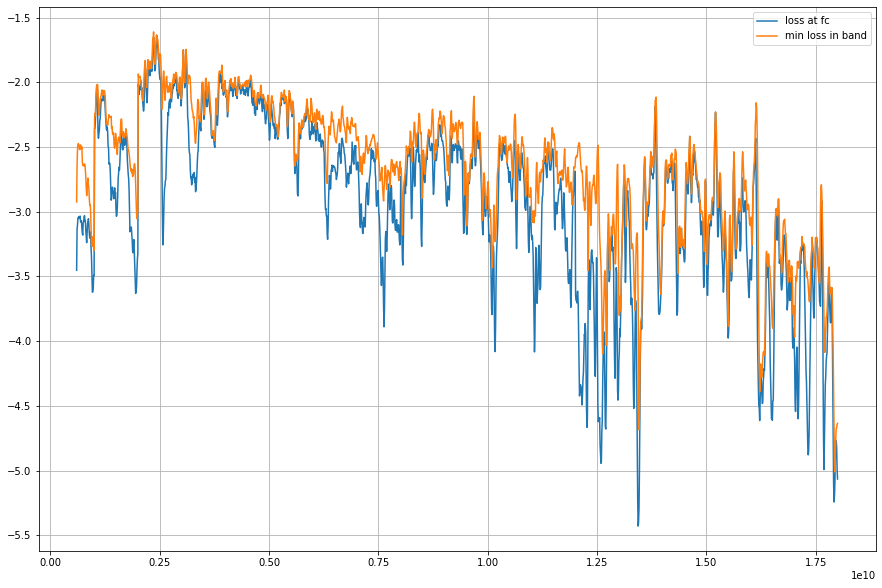

In [34]:
ld = sio.loadmat('megasweep.mat')
megaSweep =ld['sweep']
megaSpan = ld['span']
fc = megaSpan[:,100]

plt.rcParams['figure.figsize'] = [15, 50]
plt.imshow(dB(megaSweep))
plt.contour(dB(megaSweep), [-4, -3, -2, -1])
plt.plot([100, 100], [0, len(fc)])
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
normLoss = dB(megaSweep[:,100])
minLoss = np.max(dB(megaSweep), axis=1) 

plt.plot(fc, normLoss, label='loss at fc')
plt.plot(fc, minLoss, label = 'min loss in band')

plt.grid(True)
plt.legend()

print(np.sqrt(np.mean(np.square(normLoss))), np.min(normLoss), np.max(normLoss));
print(np.sqrt(np.mean(np.square(minLoss))), np.min(minLoss), np.max(minLoss));


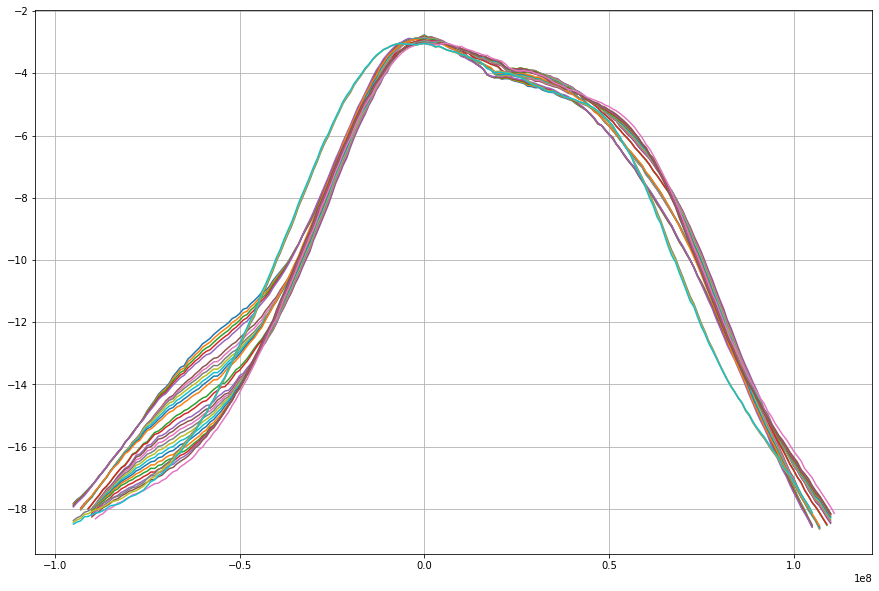

In [35]:
import scipy.interpolate

ld = sio.loadmat('megasweep.mat')
megaSweep =ld['sweep']
megaSpan = ld['span']
fp =megaSpan[:,100]
fc = np.ones(megaSpan.shape)*fp[:,None]
pf = megaSpan[0,:]-fp[0]
interp = scipy.interpolate.interp2d(pf, fp, np.abs(megaSweep))

class FineTuner:
    def __init__(self, model, pf):
        self.model = model
        self.pf = pf
    
    def tuneOffset(self, fc):
        nv = self.model(self.pf, fc)
        ma =np.argmax(nv)
        return -self.pf[ma]

ft = FineTuner(interp, pf)
for fc in np.linspace(10.01e9, 10.05e9, 30):
    plt.plot(pf+ft.tuneOffset(fc), dB(interp(pf, fc)))
plt.grid(True)

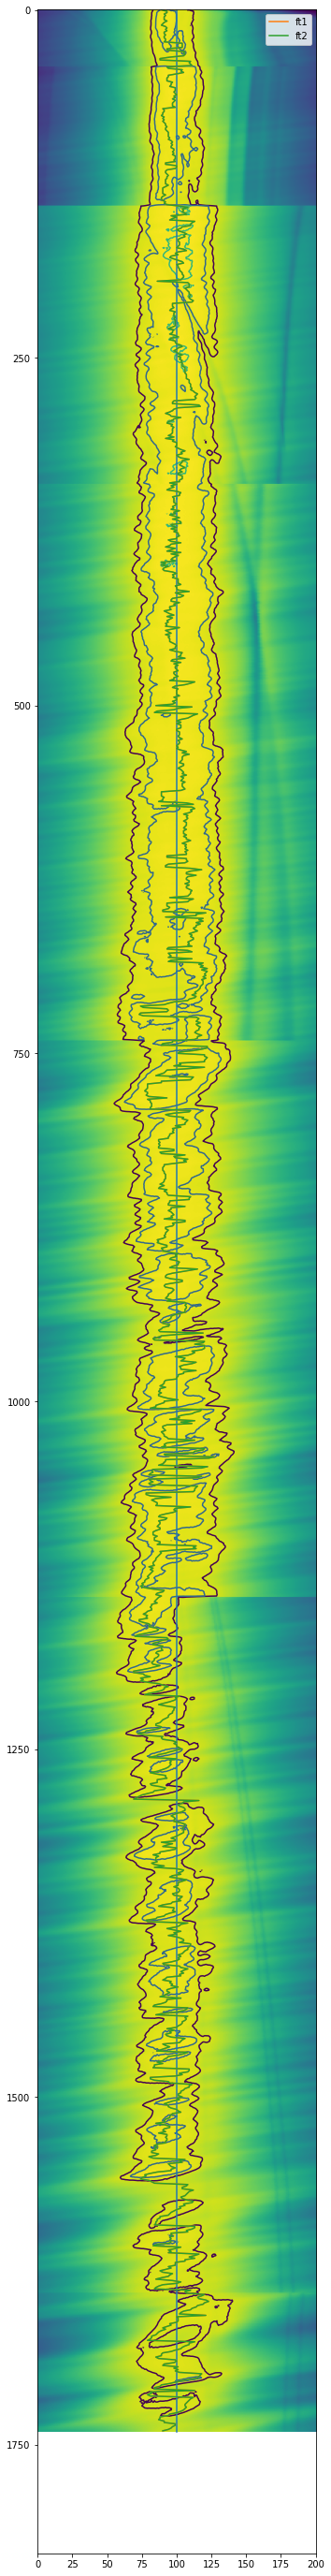

In [36]:
import scipy.interpolate

ld = sio.loadmat('megasweep.mat')
megaSweep =ld['sweep']
megaSpan = ld['span']
fp =megaSpan[:,100]

pf = megaSpan[0,:]-fp[0]
interp = scipy.interpolate.interp2d(pf, fp, np.abs(megaSweep))

class FineTuner:
    def __init__(self, model, pf):
        self.model = model
        self.pf = pf
    
    def tuneOffset(self, fc):
        nv = self.model(self.pf, fc)
        ma =np.argmax(nv)
        return -self.pf[ma]

    
class FineTuner2:
    def __init__(self, filterData, filterSpan):
        self.filterData = np.abs(filterData)
        self.filterSpan = filterSpan
        self.cfs = np.squeeze(filterSpan[:,100])
    
    def tuneOffset(self, fc):
        deltf = np.abs(self.cfs-fc)
        #print(deltf)
        minidx = np.argmin(deltf)
        #print("min index", minidx)
        nv = self.filterData[minidx, :]
        ma =np.argmax(nv)
        #print(ma)
        #print(self.filterSpan[minidx,:] )
        return fc-self.filterSpan[minidx, ma]    
    
ft = FineTuner(interp, pf)
ft2 = FineTuner2(megaSweep, megaSpan)
#print("tune2", ft2.tuneOffset(1.2e9))
#print("tune1", ft.tuneOffset(1.2e9))
plt.rcParams['figure.figsize'] = [15, 50]
plt.imshow(dB(megaSweep))
plt.contour(dB(megaSweep), [-4, -3, -2, -1])
plt.plot([100, 100], [0, len(fp)])

opt = []
for f in fp:
    opt.append(ft.tuneOffset(f))
opt = np.array(opt)

opt2 = []
for f in fp:
    opt2.append(ft2.tuneOffset(f))
opt2 = np.array(opt2)



yrang = np.arange(0, len(fp))
plt.plot(100-opt/1e6, yrang, label='ft1')
plt.plot(100-opt2/1e6, yrang, label='ft2')
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()      

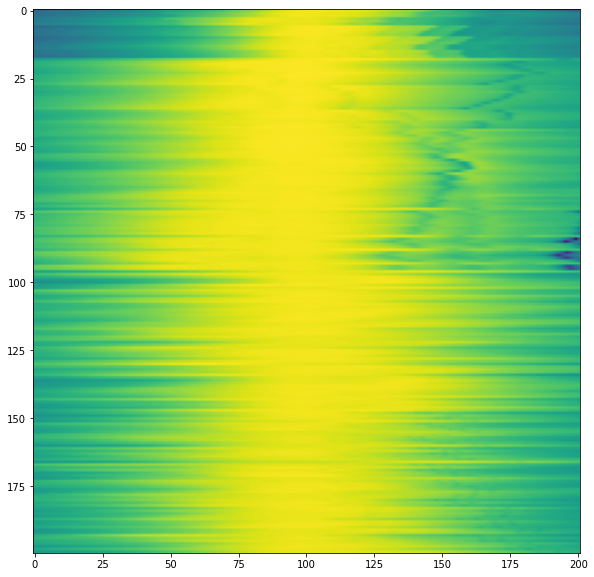

In [37]:
frange = np.linspace(600e6, 16e9, 200)
#frange = np.linspace(6e9, 6.1e9, 20)
opt = []
for f in frange:
    opt.append(ft.tuneOffset(f))
opt=np.array(opt)

opt2 = []
for f in frange:
    opt2.append(ft.tuneOffset(f))
opt2=np.array(opt2)

sectionSweepOpt, sectionSeepSpanOpt = fsweepOffs(frange, opt, 100e6)
plt.figure()
plt.imshow(dB(sectionSweepOpt))


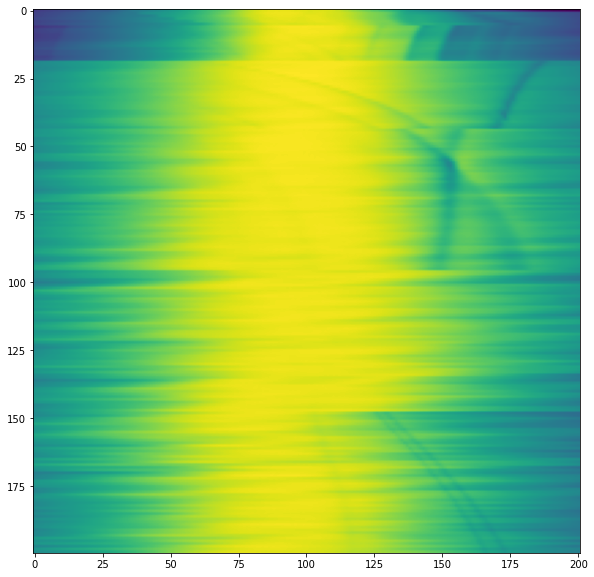

In [38]:
sectionSweepNorm, sectionSeepSpanNorm = fsweep(frange, 100e6)
plt.figure()
plt.imshow(dB(sectionSweepNorm))

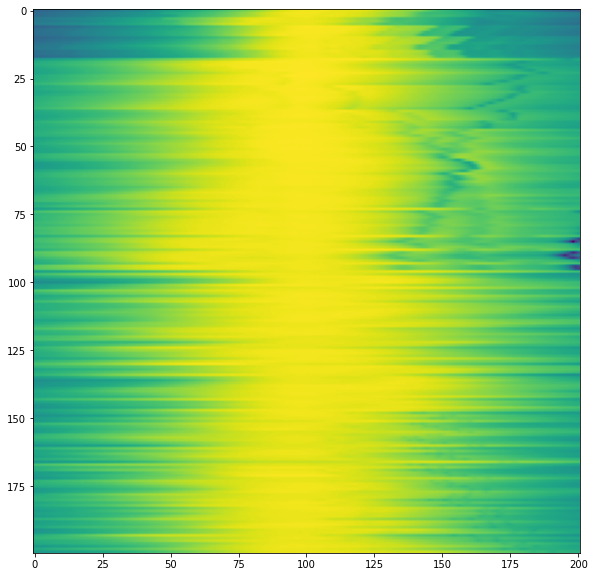

In [39]:
sectionSweepOpt2, sectionSeepSpanOpt2 = fsweepOffs(frange, opt2, 100e6)
plt.figure()
plt.imshow(dB(sectionSweepOpt2))

RMS loss -2.6220313409349707
Mean loss -2.634236350378753


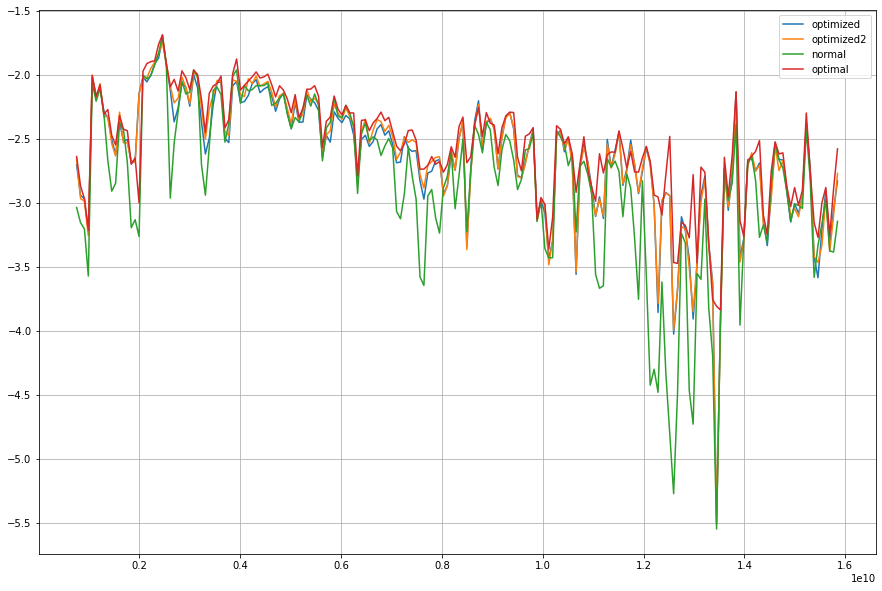

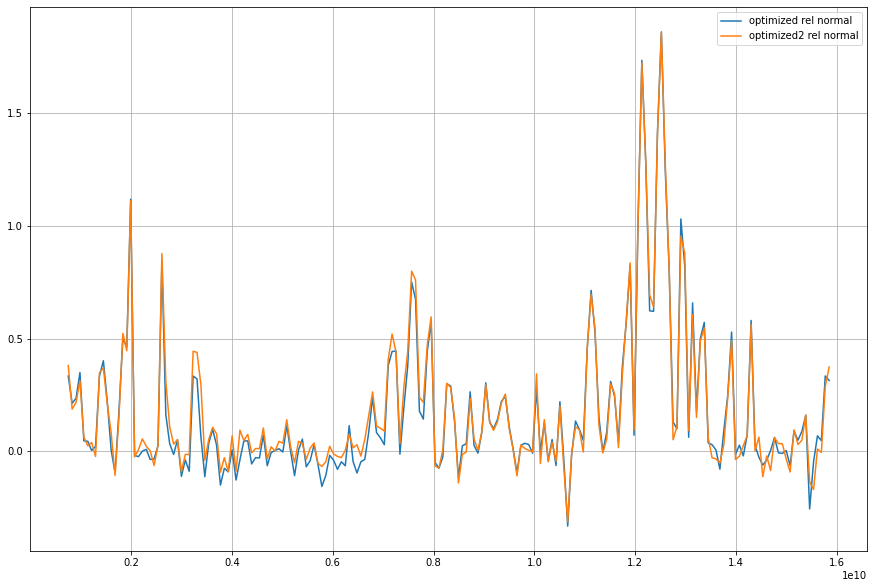

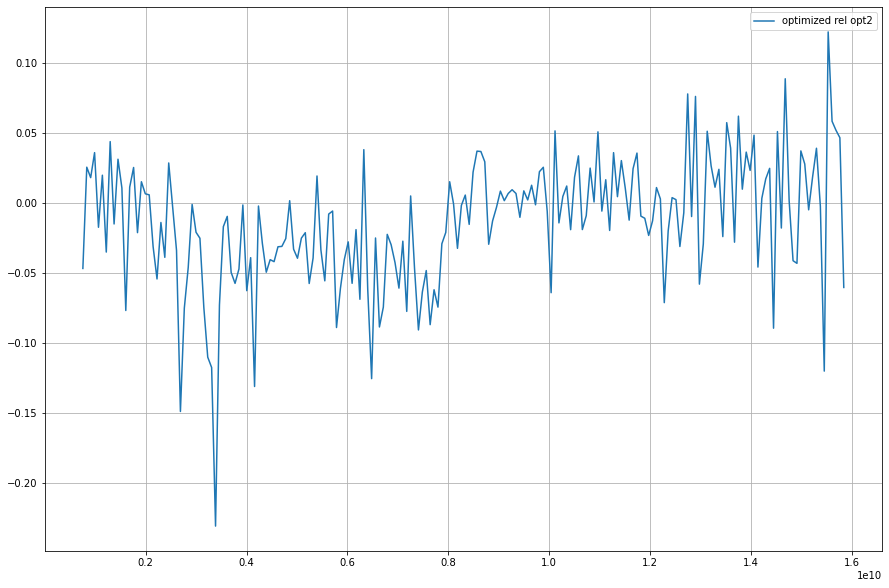

In [40]:
plt.figure()
plt.plot(frange[2:-2], dB(sectionSweepOpt[2:-2,100]), label='optimized')
plt.plot(frange[2:-2], dB(sectionSweepOpt2[2:-2,100]), label='optimized2')
plt.plot(frange[2:-2], dB(sectionSweepNorm[2:-2,100]), label='normal')
plt.plot(frange[2:-2], np.max(dB(sectionSweepNorm[2:-2,:]), axis=1), label='optimal')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(frange[2:-2], dB(sectionSweepOpt[2:-2,100])-dB(sectionSweepNorm[2:-2,100]), label='optimized rel normal')
plt.plot(frange[2:-2], dB(sectionSweepOpt2[2:-2,100])-dB(sectionSweepNorm[2:-2,100]), label='optimized2 rel normal')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(frange[2:-2], dB(sectionSweepOpt[2:-2,100])-dB(sectionSweepOpt2[2:-2,100]), label='optimized rel opt2')
plt.legend()
plt.grid(True)

print("RMS loss", dB(np.sqrt(np.mean(np.square(np.abs(sectionSweepOpt[2:-2,100]))))));
print("Mean loss", dB(np.mean(np.abs(sectionSweepOpt[2:-2,100]))));

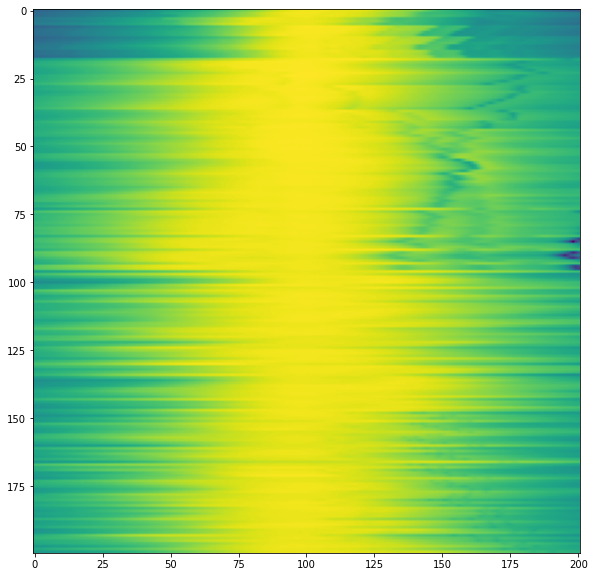

In [41]:
sectionSweepOpt22, sectionSeepSpanOpt22 = fsweepOffs(frange, opt2, 100e6)
plt.figure()
plt.imshow(dB(sectionSweepOpt22))

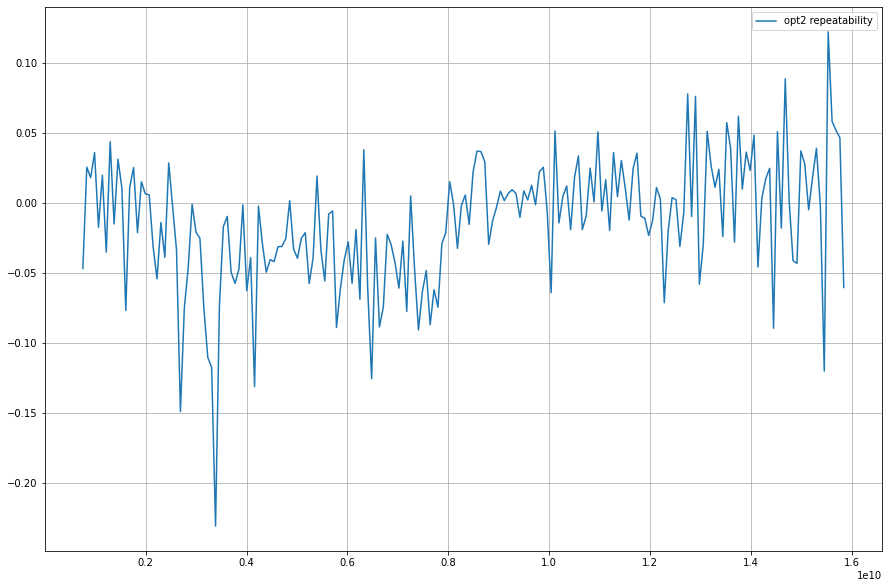

In [42]:
plt.figure()
plt.plot(frange[2:-2], dB(sectionSweepOpt[2:-2,100])-dB(sectionSweepOpt2[2:-2,100]), label='opt2 repeatability')
plt.legend()
plt.grid(True)

In [44]:
#Get calibration data
import os.path

if not os.path.exists('cal_open.s2p'):
    calPar=vna.getHighResolutionNetwork(130e6, 20e9, 1e6)
    calPar.plot_s_db()
    calPar.write_touchstone('cal_open.s2p')

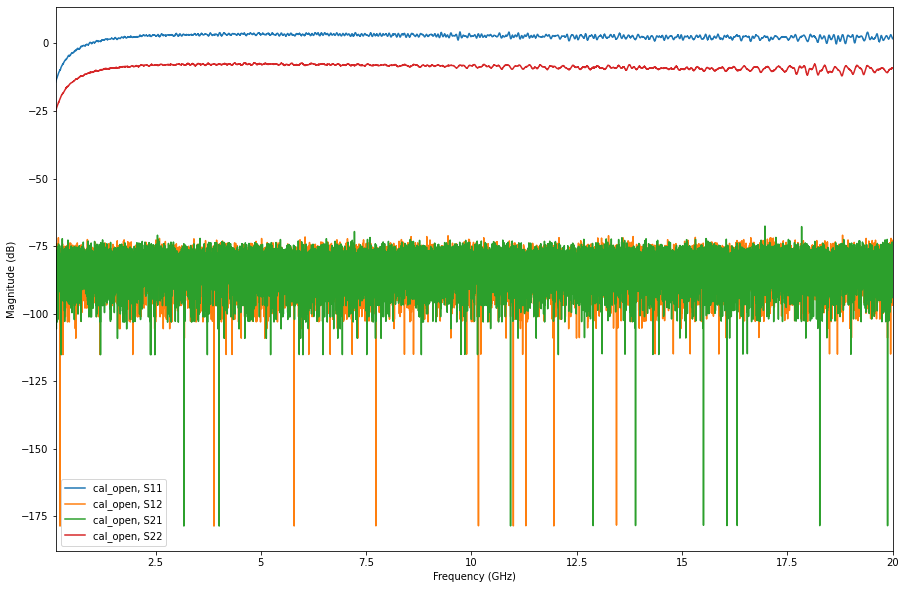

In [45]:
import skrf.network

calPar=skrf.network.Network('cal_open.s2p')
calPar.plot_s_db()

In [82]:

def fsweepRefl(frequencies, opt, span):
    vna.setPoints(201)
    filterMap=None
    spanMap=None
    #print(frequencies[0])
    #yc.tune(frequencies[0])
    #vna.setStartFrequency(frequencies[0]-span)
    #vna.setStopFrequency(frequencies[0]+span)
    #spar=vna.readSParameter('S21')
    #time.sleep(1)
    for fr, offs in zip(frequencies, opt):
        yc.tune(fr+offs)
        vna.setStartFrequency(fr-span)
        vna.setStopFrequency(fr+span)
        spar=vna.readSParameter('S11')
        fax = vna.frequencies()
        fr = skrf.Frequency.from_f(fax, unit='hz')
        cal = calPar.interpolate(fr)
        #spanMap = yig_controller_test.stackVector(spanMap, fax)
        #dePar=fix.deembedFrom(fax, calPar)
        #filterMap=yig_controller_test.stackVector(filterMap, dePar)
        filterMap=yig_controller_test.stackVector(filterMap, dB(spar)-dB(cal.s[:,0,0]))
    return filterMap, spanMap

Text(0.5, 1.0, 'S11')

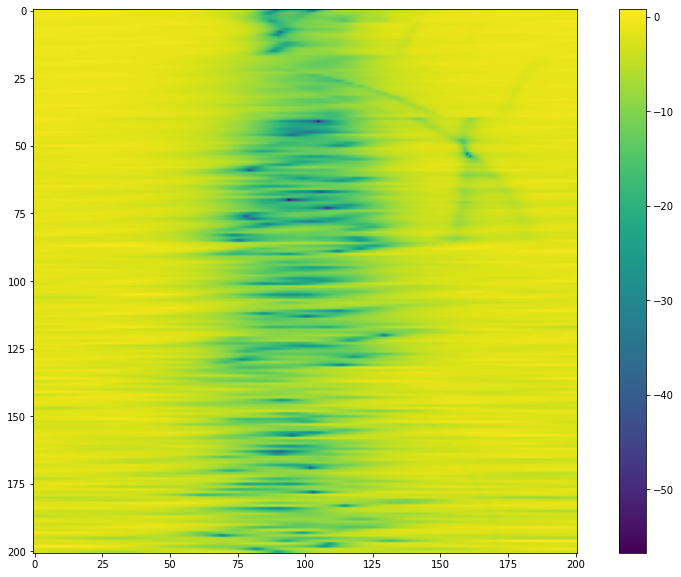

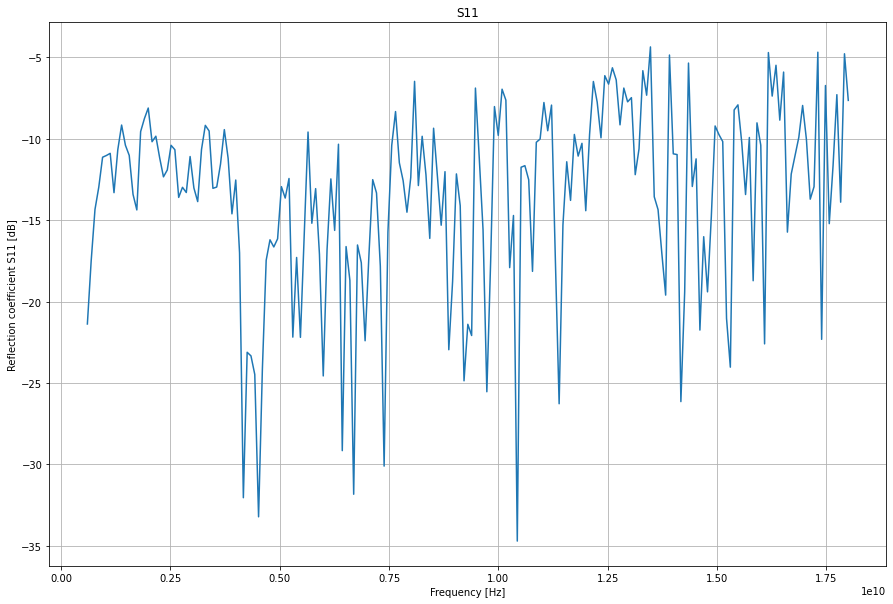

In [78]:
fr=np.linspace(600e6, 18e9, 201)

reflSweep, reflSweepSpan = fsweepRefl(fr, 100e6)
plt.figure()
plt.imshow(reflSweep)
plt.colorbar()
plt.figure()
plt.plot(fr, reflSweep[:,100])
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Reflection coefficient S11 [dB]')
plt.title('S11')

Text(0.5, 1.0, 'S11')

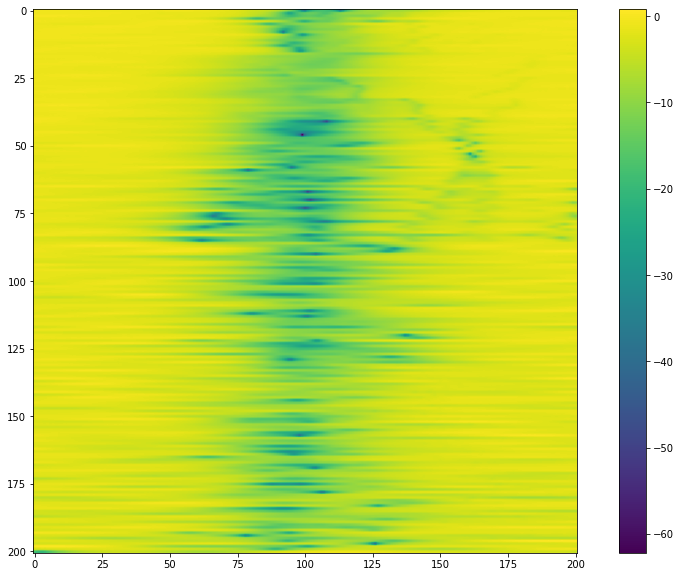

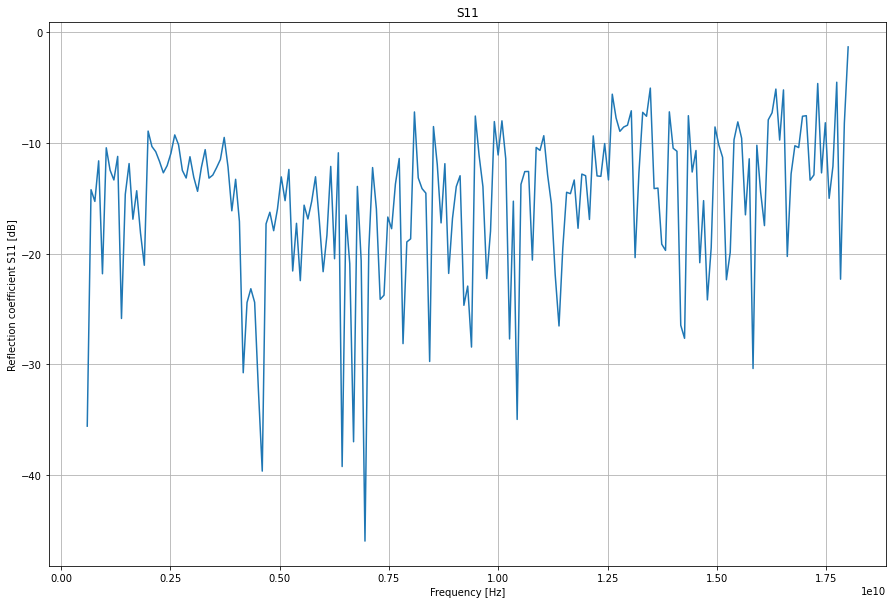

In [83]:
fr=np.linspace(600e6, 18e9, 201)
opt = []
for f in fr:
    opt.append(ft.tuneOffset(f))
opt = np.array(opt)

reflSweep, reflSweepSpan = fsweepRefl(fr, opt, 100e6)
plt.figure()
plt.imshow(reflSweep)
plt.colorbar()
plt.figure()
plt.plot(fr, reflSweep[:,100])
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Reflection coefficient S11 [dB]')
plt.title('S11')

Text(0.5, 1.0, 'S11')

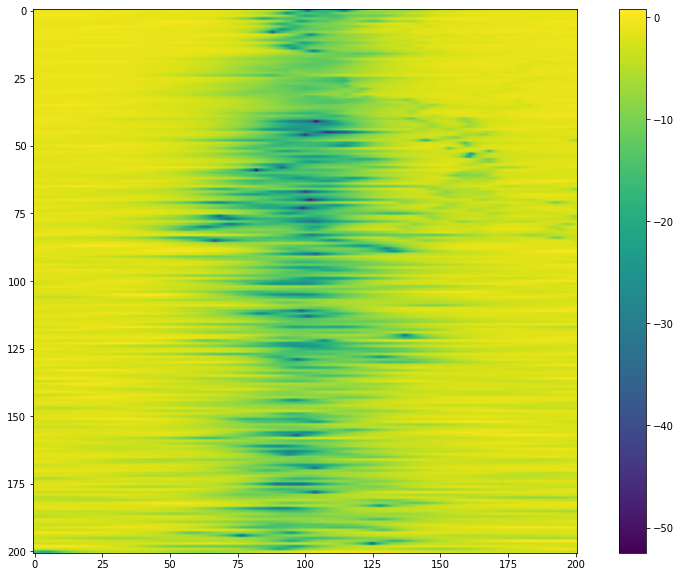

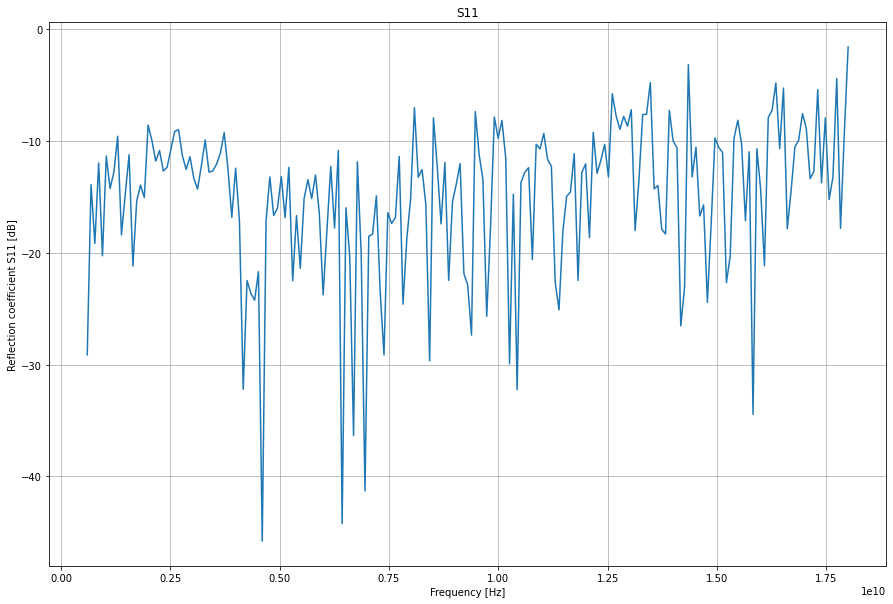

In [85]:
fr=np.linspace(600e6, 18e9, 201)
opt = []
for f in fr:
    opt.append(ft2.tuneOffset(f))
opt = np.array(opt)

reflSweep, reflSweepSpan = fsweepRefl(fr,opt, 100e6)
plt.figure()
plt.imshow(reflSweep)
plt.colorbar()
plt.figure()
plt.plot(fr, reflSweep[:,100])
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Reflection coefficient S11 [dB]')
plt.title('S11')